In [6]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker


# Construct the relative file path
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'quadcopterFeasability.csv')
data = pd.read_csv(file_path)
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'simulation-WMU501-varEffort-comparsiondf.csv')
comparison_df = pd.read_csv(file_path)

# Ensure the columns align by merging the two DataFrames on the matching columns
merged_df = data.merge(
    comparison_df[['Number_of_Plots', 'Mean_Cover_Percentage']],
    left_on='subplots',
    right_on='Number_of_Plots',
    how='left'
)

# Replace the 'area_p' column in the original DataFrame with 'Mean_Cover_Percentage'
data['area_p'] = merged_df['Mean_Cover_Percentage']

# Exclude entries with trueDensity > 1500
data = data[data['trueDensity'] <= 1500]

View data

In [7]:
data

,subplots,mean_n,area,trueDensity,d_number,CV,area_p
0,15,12,190,75.159,0.25,0.746,8.55
1,15,22,190,150.319,0.50,0.322,8.55
2,15,33,190,225.478,0.75,0.355,8.55
3,15,39,190,300.638,1.00,0.272,8.55
4,15,79,190,601.275,2.00,0.180,8.55
5,15,158,190,1202.551,4.00,0.130,8.55
7,31,19,392,58.051,0.25,0.339,17.68
8,31,38,392,116.102,0.50,0.264,17.68
9,31,55,392,174.154,0.75,0.222,17.68
10,31,63,392,232.205,1.00,0.191,17.68


In [ ]:
comparison_df

3D plot

In [ ]:
# Extract columns
area = data['area_p']
density = data['trueDensity']
detections = data['mean_n']

# Define colors based on the number of detections
# Create a continuous color scale based on number of detections
colors = []
for detection in detections:
    if detection < 60:
        colors.append('red')
    elif 60 <= detection <= 80:
        colors.append('yellow')
    else:
        colors.append('green')
colorscale = [[0, 'red'], [0.5, 'yellow'], [1, 'green']]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=area,
    y=density,
    z=detections,
    mode='markers',
    marker=dict(
        size=5,
        size=8,  # Increased marker size
        color=colors,  # set color to an array/list of desired values
        color=detections,  # Color based on detection values
        colorscale=colorscale,
        colorbar=dict(
            title='Number of Detections',
            tickformat='.0f'
        ),
        opacity=0.8
    )
        opacity=1.0
    ),
    name='Detections'
)])

# Labels and tick marks
# Update layout with better formatting
fig.update_layout(
    title=dict(
        text='Quadcopter Survey Feasibility Analysis',
        x=0.5,
        y=0.95,
        font=dict(size=20)
    ),
    scene=dict(
        xaxis=dict(
            title='Relative area covered',
            title='Relative Area Covered (%)',
            tickmode='linear',
            dtick=5.0  # Set ticks in 0.2 increments
            dtick=5.0,
            gridcolor='lightgray'
        ),
        yaxis=dict(
            title='Density (animals/1000km^2)'
            title='Density (animals/1000km²)',
            gridcolor='lightgray'
        ),
        zaxis=dict(
            title='Number of Detections',
            gridcolor='lightgray'
        ),
        zaxis_title='Number of Detections'
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.2),  # Adjusted camera angle
            up=dict(x=0, y=0, z=1)
        ),
        aspectratio=dict(x=1, y=1, z=0.7)
    )
)


# Define the x-axis regions with reduced opacity
x_orange = np.linspace(10, 15, 50)  # Orange region between 8 and 16
x_orange = np.linspace(10, 15, 50)
x_red = np.linspace(0, 10, 50)      # Red region below 8

# Define y and z ranges for the shaded regions
x_red = np.linspace(0, 10, 50)
y_range = np.linspace(density.min(), density.max(), 50)
z_range = np.linspace(detections.min(), detections.max(), 50)

# Create mesh grids for the orange region
# Create mesh grids
x_orange_grid, y_orange_grid = np.meshgrid(x_orange, y_range)
z_orange_grid = np.full_like(x_orange_grid, detections.min())  # Flat plane at the bottom

# Create mesh grids for the red region
x_red_grid, y_red_grid = np.meshgrid(x_red, y_range)
z_orange_grid = np.full_like(x_orange_grid, detections.min())
z_red_grid = np.full_like(x_red_grid, detections.min())  # Flat plane at the bottom
z_red_grid = np.full_like(x_red_grid, detections.min())

# Add the orange region as a surface
# Add the warning regions with reduced opacity
fig.add_trace(go.Surface(
    x=x_orange_grid,
    y=y_orange_grid,
    z=z_orange_grid,
    colorscale=[[0, 'orange'], [1, 'orange']],
    opacity=0.3,
    opacity=0.2,
    showscale=False
    showscale=False,
    name='Warning Zone'
))

# Add the red region as a surface
fig.add_trace(go.Surface(
    x=x_red_grid,
    y=y_red_grid,
    z=z_red_grid,
    colorscale=[[0, 'red'], [1, 'red']],
    opacity=0.3,
    opacity=0.2,
    showscale=False
    showscale=False,
    name='Critical Zone'
))

# Show plot
fig.show()

# Save the plot as an HTML file
output_html_path = os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot.html')
pio.write_html(fig, output_html_path)


2D plot

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_5368\2484407984.py:13: UserWarning:

You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



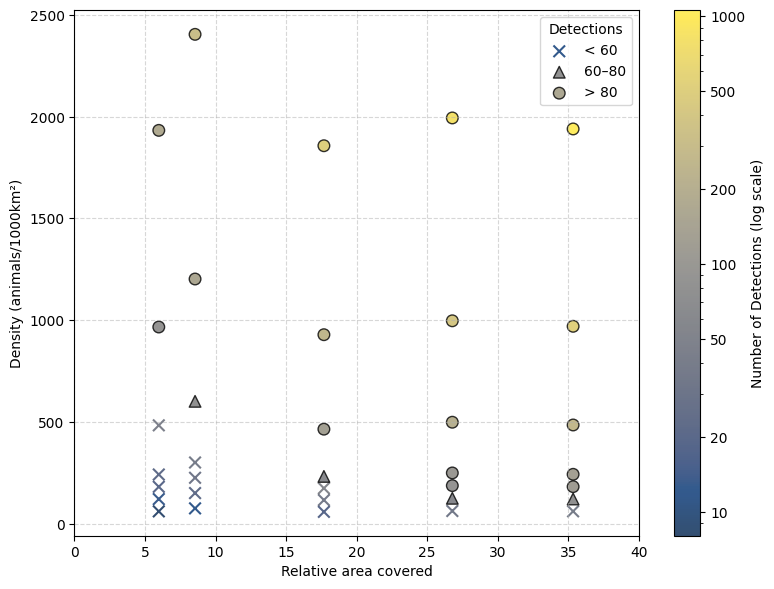

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Masks for each group
mask_x = data['mean_n'] < 60
mask_triangle = (data['mean_n'] >= 60) & (data['mean_n'] <= 80)
mask_circle = data['mean_n'] > 80

# Use a colorblind-friendly colormap for all points
cmap = plt.get_cmap('cividis')
norm = mpl.colors.LogNorm(vmin=data['mean_n'].min()+1e-6, vmax=data['mean_n'].max())  # Avoid log(0)

# Plot each group with different marker
sc_x = ax.scatter(
    data.loc[mask_x, 'area_p'],
    data.loc[mask_x, 'trueDensity'],
    c=data.loc[mask_x, 'mean_n'],
    cmap=cmap,
    norm=norm,
    marker='x',
    s=70,
    alpha=0.8,
    edgecolor='k',
    label='< 60'
)
sc_triangle = ax.scatter(
    data.loc[mask_triangle, 'area_p'],
    data.loc[mask_triangle, 'trueDensity'],
    c=data.loc[mask_triangle, 'mean_n'],
    cmap=cmap,
    norm=norm,
    marker='^',
    s=70,
    alpha=0.8,
    edgecolor='k',
    label='60–80'
)
sc_circle = ax.scatter(
    data.loc[mask_circle, 'area_p'],
    data.loc[mask_circle, 'trueDensity'],
    c=data.loc[mask_circle, 'mean_n'],
    cmap=cmap,
    norm=norm,
    marker='o',
    s=70,
    alpha=0.8,
    edgecolor='k',
    label='> 80'
)

ax.set_xlabel('Relative area covered')
ax.set_ylabel('Density (animals/1000km²)')

ax.set_xticks(ax.get_xticks())
ax.grid(True, linestyle='--', alpha=0.5)

# Choose tick values (for example, powers of 10 within your data range)
vmin = data['mean_n'].min()
vmax = data['mean_n'].max()
# You can customize these ticks as needed
ticks = [10, 20, 50, 100, 200, 500, 1000]
ticks = [t for t in ticks if vmin <= t <= vmax]

cbar = fig.colorbar(sc_circle, ax=ax, ticks=ticks)
cbar.set_label('Number of Detections (log scale)')
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
cbar.ax.yaxis.set_minor_formatter(ticker.NullFormatter())


ax.legend(title='Detections')
plt.tight_layout()
plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot_2D.png'), dpi=300)
plt.show()

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_5368\1200690380.py:13: UserWarning:

You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



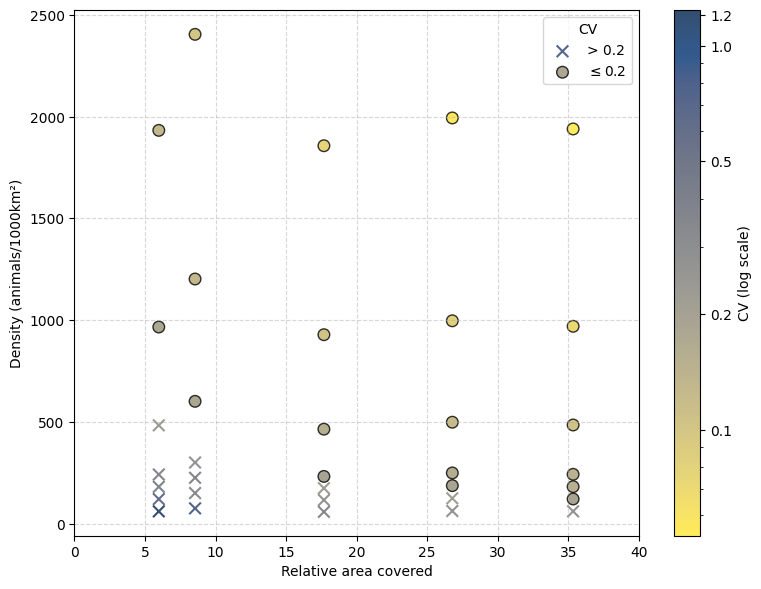

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))

# Masks for each group
mask_x = data['CV'] > 0.2
mask_circle = data['CV'] < 0.2

# Use a colorblind-friendly colormap for all points
cmap = plt.get_cmap('cividis_r')
# norm = plt.Normalize(data['CV'].min(), data['CV'].max())
norm = mpl.colors.LogNorm(vmin=data['CV'].min()+1e-6, vmax=data['CV'].max())  # Avoid log(0)

# Plot each group with different marker
sc_x = ax.scatter(
    data.loc[mask_x, 'area_p'],
    data.loc[mask_x, 'trueDensity'],
    c=data.loc[mask_x, 'CV'],
    cmap=cmap,
    norm=norm,
    marker='x',
    s=70,
    alpha=0.8,
    edgecolor='k',
    label='> 0.2'
)
sc_circle = ax.scatter(
    data.loc[mask_circle, 'area_p'],
    data.loc[mask_circle, 'trueDensity'],
    c=data.loc[mask_circle, 'CV'],
    cmap=cmap,
    norm=norm,
    marker='o',
    s=70,
    alpha=0.8,
    edgecolor='k',
    label=r'$\leq 0.2$'
)

ax.set_xlabel('Relative area covered')
ax.set_ylabel('Density (animals/1000km²)')
ax.set_xticks(ax.get_xticks())
ax.grid(True, linestyle='--', alpha=0.5)

# Choose tick values (for example, powers of 10 within your data range)
vmin = data['CV'].min()
vmax = data['CV'].max()
# You can customize these ticks as needed
ticks = [0.1, 0.2, 0.5, 1.0, 1.2]
ticks = [t for t in ticks if vmin <= t <= vmax]

cbar = fig.colorbar(sc_circle, ax=ax, ticks=ticks)
cbar.set_label('CV (log scale)')
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
cbar.ax.yaxis.set_minor_formatter(ticker.NullFormatter())


ax.legend(title='CV')
plt.tight_layout()
# plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot_2D.png'), dpi=300)
plt.show()

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_27460\1831365286.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_27460\1831365286.py:92: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(


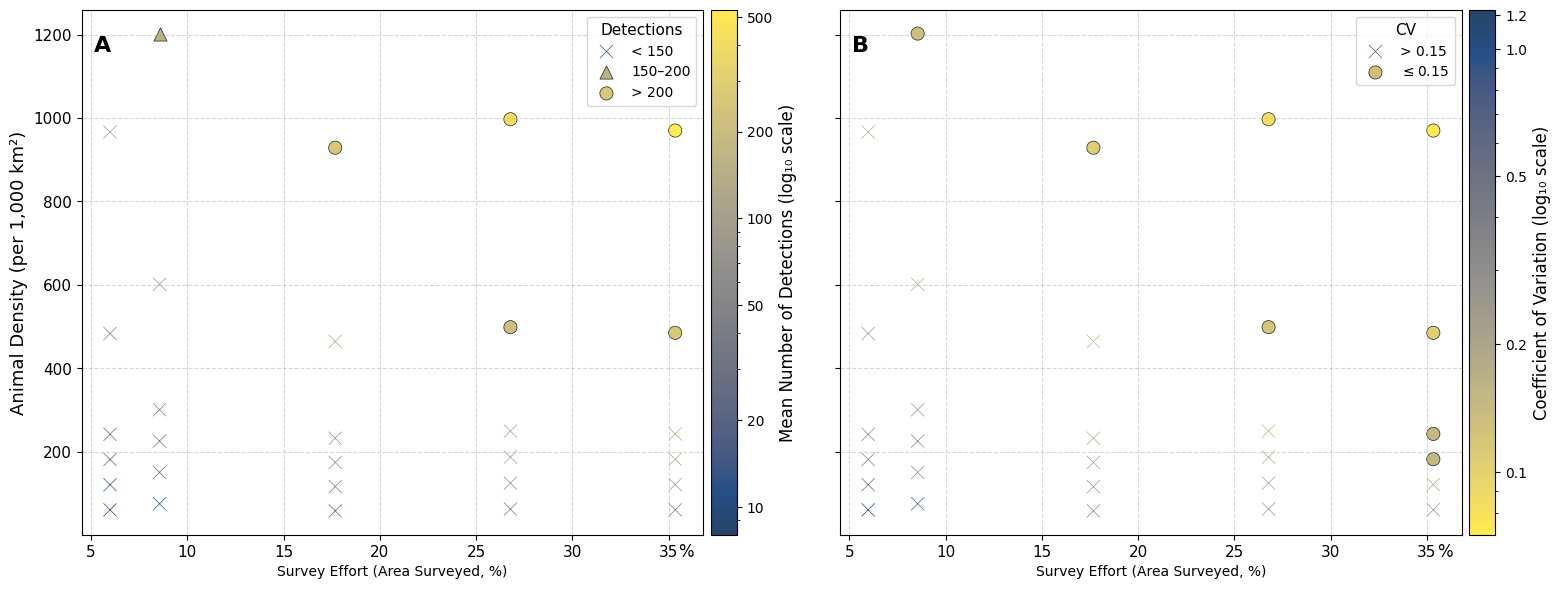

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Format x-axis ticks as integers (no % symbol)
for ax in axes:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}"))
    ax.set_xlabel("Survey Effort (Area Surveyed, %)")
    ax.annotate('%', xy=(0.96, -0.015), xycoords='axes fraction',
        fontsize=12, ha='left', va='top')


# --- First subplot: mean_n ---
ax = axes[0]
mask_x = data['mean_n'] < 150
mask_triangle = (data['mean_n'] >= 150) & (data['mean_n'] <= 200)
mask_circle = data['mean_n'] > 200
cmap1 = plt.get_cmap('cividis')
norm1 = mpl.colors.LogNorm(vmin=data['mean_n'].min()+1e-6, vmax=data['mean_n'].max())

# Scatter plots
sc_x = ax.scatter(
    data.loc[mask_x, 'area_p'],
    data.loc[mask_x, 'trueDensity'],
    c=data.loc[mask_x, 'mean_n'],
    cmap=cmap1,
    norm=norm1,
    marker='x',
    s=90,
    alpha=0.85,
    edgecolor='k',
    linewidth=0.5,
    label='< 150'
)
sc_triangle = ax.scatter(
    data.loc[mask_triangle, 'area_p'],
    data.loc[mask_triangle, 'trueDensity'],
    c=data.loc[mask_triangle, 'mean_n'],
    cmap=cmap1,
    norm=norm1,
    marker='^',
    s=90,
    alpha=0.85,
    edgecolor='k',
    linewidth=0.5,
    label='150–200'
)
sc_circle = ax.scatter(
    data.loc[mask_circle, 'area_p'],
    data.loc[mask_circle, 'trueDensity'],
    c=data.loc[mask_circle, 'mean_n'],
    cmap=cmap1,
    norm=norm1,
    marker='o',
    s=90,
    alpha=0.85,
    edgecolor='k',
    linewidth=0.5,
    label='> 200'
)


# Labels and formatting
# ax.set_xlabel('Area Surveyd (%)', fontsize=13)
ax.set_ylabel('Animal Density (per 1,000 km²)', fontsize=13)
ax.text(0.02, 0.95, 'A', transform=ax.transAxes,
        fontsize=16, fontweight='bold', va='top', ha='left')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.5)


# Colorbar
ticks1 = [10, 20, 50, 100, 200, 500, 1000]
ticks1 = [t for t in ticks1 if data['mean_n'].min() <= t <= data['mean_n'].max()]
cbar1 = fig.colorbar(sc_circle, ax=ax, ticks=ticks1, pad=0.01)
cbar1.set_label('Mean Number of Detections (log₁₀ scale)', fontsize=12)
cbar1.ax.tick_params(labelsize=10)
cbar1.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
cbar1.ax.yaxis.set_minor_formatter(ticker.NullFormatter())
ax.legend(title='Detections', fontsize=10, title_fontsize=11)


# --- Second subplot: CV ---
ax = axes[1]
mask_x = data['CV'] > 0.15
mask_circle = data['CV'] <= 0.15
cmap2 = plt.get_cmap('cividis_r')
norm2 = mpl.colors.LogNorm(vmin=data['CV'].min()+1e-6, vmax=data['CV'].max())

sc_x = ax.scatter(
    data.loc[mask_x, 'area_p'],
    data.loc[mask_x, 'trueDensity'],
    c=data.loc[mask_x, 'CV'],
    cmap=cmap2,
    norm=norm2,
    marker='x',
    s=90,
    alpha=0.85,
    edgecolor='k',
    linewidth=0.5,
    label='> 0.15'
)
sc_circle = ax.scatter(
    data.loc[mask_circle, 'area_p'],
    data.loc[mask_circle, 'trueDensity'],
    c=data.loc[mask_circle, 'CV'],
    cmap=cmap2,
    norm=norm2,
    marker='o',
    s=90,
    alpha=0.85,
    edgecolor='k',
    linewidth=0.5,
    label=r'$\leq 0.15$'
)


# Labels and formatting
# ax.set_xlabel('Area Surveyd (%)', fontsize=13)
ax.text(0.02, 0.95, 'B', transform=ax.transAxes,
        fontsize=16, fontweight='bold', va='top', ha='left')

ax.tick_params(axis='both', which='major', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.5)

# Colorbar
ticks2 = [0.1, 0.2, 0.5, 1.0, 1.2]
ticks2 = [t for t in ticks2 if data['CV'].min() <= t <= data['CV'].max()]
cbar2 = fig.colorbar(sc_circle, ax=ax, ticks=ticks2, pad=0.01)
cbar2.set_label('Coefficient of Variation (log₁₀ scale)', fontsize=12)
cbar2.ax.tick_params(labelsize=10)
cbar2.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
cbar2.ax.yaxis.set_minor_formatter(ticker.NullFormatter())
ax.legend(title='CV', fontsize=10, title_fontsize=11)

plt.tight_layout()
# plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot_2D_combined.png'), dpi=300)
plt.show()